In [37]:
# Plotting genomes QC in R - scatter plots: completeness x contamination

In [38]:
## import dataset into Rstudio
library(ggplot2)
genomes <- read.table("data/genome_quality_filt_Whead.txt", header = TRUE)
head(genomes)

,Genome_ID,Completeness,Contamination
,<chr>,<dbl>,<dbl>
1,GCA_000009005.1_ASM900v1_genomic,98.81554,0.22070626
2,GCA_000009585.1_ASM958v1_genomic,99.50843,0.08025682
3,GCA_000010445.1_ASM1044v1_genomic,99.50843,0.08025682
4,GCA_000009645.1_ASM964v1_genomic,99.50843,0.08025682
5,GCA_000009665.1_ASM966v1_genomic,99.50843,0.08025682
6,GCA_000010465.1_ASM1046v1_genomic,99.46161,0.08025682


In [39]:
## Set cutoff values
completeness_cutoff <- 97
contamination_cutoff <- 3

In [40]:
## Create a new column for color based on conditions
genomes$Color <- ifelse(genomes$Completeness > completeness_cutoff & genomes$Contamination < contamination_cutoff, "Above Cutoff", "Below Cutoff")
head(genomes)

,Genome_ID,Completeness,Contamination,Color
,<chr>,<dbl>,<dbl>,<chr>
1,GCA_000009005.1_ASM900v1_genomic,98.81554,0.22070626,Above Cutoff
2,GCA_000009585.1_ASM958v1_genomic,99.50843,0.08025682,Above Cutoff
3,GCA_000010445.1_ASM1044v1_genomic,99.50843,0.08025682,Above Cutoff
4,GCA_000009645.1_ASM964v1_genomic,99.50843,0.08025682,Above Cutoff
5,GCA_000009665.1_ASM966v1_genomic,99.50843,0.08025682,Above Cutoff
6,GCA_000010465.1_ASM1046v1_genomic,99.46161,0.08025682,Above Cutoff


ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while converting geom to grob.
ℹ Error occurred in the 1st layer.
Caused by error:
! Malformed colour string `#black`. Must contain either 6 or 8 hex values

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

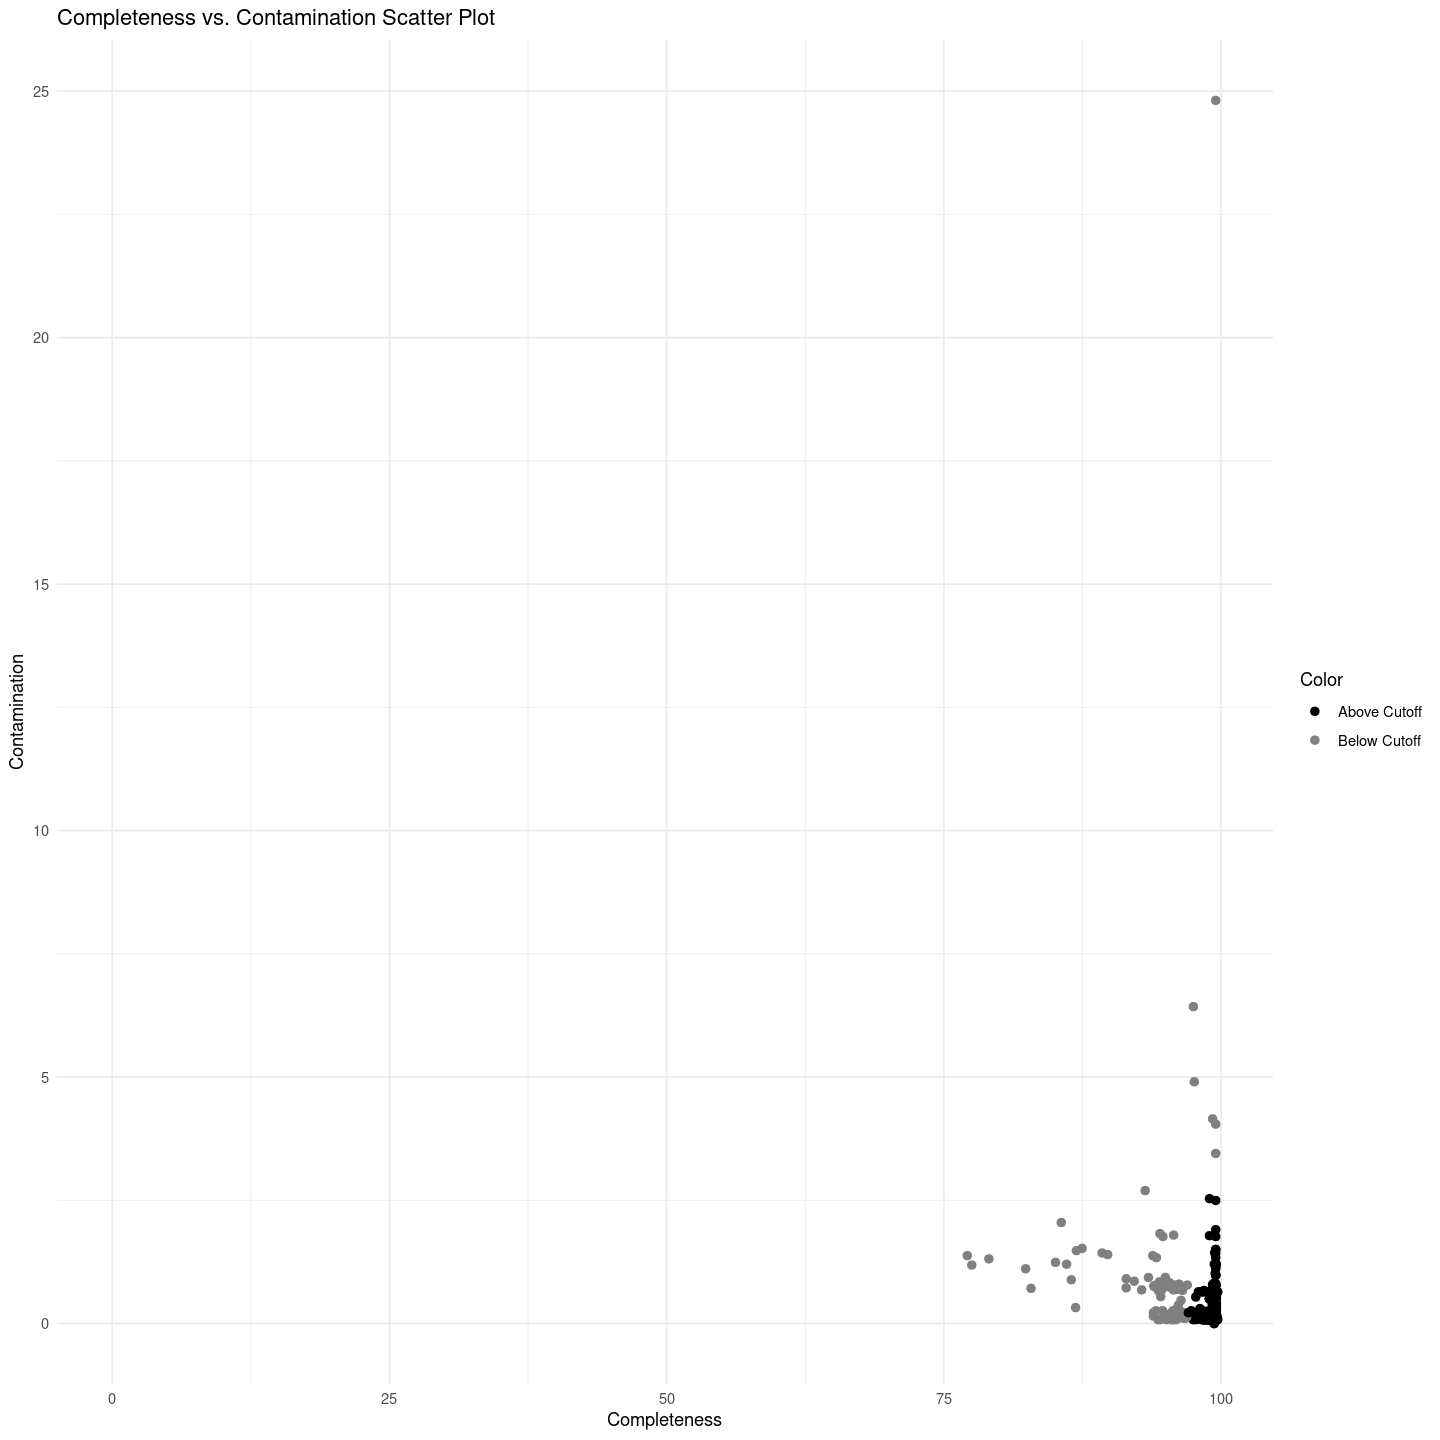

In [41]:
## Figure 1A
### Create scatter plot
A <- ggplot(genomes, aes(x = Completeness, y = Contamination, color = Color)) +
  geom_point(size = 2) +
  scale_color_manual(values = c("Above Cutoff" = "black", "Below Cutoff" = "#808080")) +
  labs(title = "Completeness vs. Contamination Scatter Plot", x = "Completeness", y = "Contamination") +
  theme_minimal() +
  expand_limits(x = 0, y = 0)  # Set the axes to start at zero
A
## Figure 1B
### Create scatter plot
B <- ggplot(genomes, aes(x = Completeness, y = Contamination, color = Color)) +
  geom_point(size = 2) +
  scale_color_manual(values = c("Above Cutoff" = "black", "Below Cutoff" = "#808080")) +
  labs(title = "Completeness vs. Contamination Scatter Plot", x = "Completeness", y = "Contamination") +
  theme_minimal()
B  

In [42]:
## Combine figures 
options(repr.plot.width=12, repr.plot.height=12)

library(ggpubr)

ggarrange(A, B, 
          labels = c("A", "B"),
          font.label = list(size = 18),
          ncol = 2, nrow = 1)

ERROR: [1m[33mError[39m in `purrr::map()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[1mCaused by error in `geom_point()`:[22m
[1m[22m[33m![39m Problem while converting geom to grob.
[36mℹ[39m Error occurred in the 1st layer.
[1mCaused by error:[22m
[33m![39m Malformed colour string `#black`. Must contain either 6 or 8 hex values
